# Ant Colony Optimisation: Example Program

This is a simple illustration of Ant Colony Optimisation for a Travelling Salesperson Problem, for the course Natural Computing course at University of Edinburgh. This is by no means perfect code and should not be taken as such. The code is adapted form the earlied used GA, but here the optimisation is done by ACO.

In [1]:
import numpy as np
import random
import operator
import matplotlib.pyplot as plt

# Problem representation

In this formulation the individual genes of our solutions consist of cities the agent visits along the route, the chromosome being the full route. First we make a class for each city, that contains their personal coordinates in plane, and a function for computing the distance between a given city and another.

In [2]:
class City:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def distance_to(self, city):
        x = np.abs(self.x - city.x)
        y = np.abs(self.y - city.y)
        distance = np.sqrt((x*x)+(y*y))
        return distance
    
    def __repr__(self):
        return "[" + str(self.x)+","+str(self.y)+"]"

Given that we are able to generate individual cities, we will now create our complete set of cities. Also the main ingredients for ACO are generated here.

In [3]:
NoC=32

dist = np.zeros((NoC,NoC))

cities = []

for i in range(NoC):
    cities.append(City((np.random.randint(0, NoC)), np.random.randint(0,NoC))) # integer positions are good enough here

print(cities)

eta = np.zeros((NoC,NoC))

for i in range(NoC):    
    for j in range(NoC):
        dist[i][j]=(cities[i].distance_to(cities[j]))
        if dist[i][j]>1.0e-6:
            eta[i][j]=1.0/(dist[i][j]*dist[i][j])                           # this means beta = 2
        else:
            eta[i][j]=1.0e-6
            
tau = np.random.rand(NoC,NoC)


[[18,30], [28,28], [16,2], [29,10], [2,14], [4,2], [2,18], [31,21], [5,23], [31,9], [22,29], [4,22], [20,12], [21,24], [11,2], [1,17], [17,27], [30,25], [2,21], [4,1], [16,22], [18,8], [14,4], [5,26], [1,17], [0,17], [15,23], [26,28], [1,15], [16,14], [15,12], [2,20]]


The folling is a step (iteration) for an ACO algorithm. Each ants takes a pass through the cities, on a path that is prodcued by the pheromones and the local heuristics. You may notice that this function is derived from a C program.

In [7]:
def ACO_step(NoA,rho,ff_min):
    aa=np.zeros(NoC)
    am=np.zeros(NoC)
    ll=[0 for i in range(NoC)]
    q=[0 for i in range(NoC)]
    ff = np.random.rand(NoA)
    
    fg=1.0e12
    ng=-1.0                                  # index of best ant
    for n in range(NoA):                     # for each ant
        aa[0]=np.random.randint(0, NoC)      # random starting city
        lng=NoC-1                              # remaining tour length
        for i in range(lng):
            if i==aa[0]: 
                ll[i]=NoC-1
            else:
                ll[i]=i
        
        for m in range(1,NoC): 
            ll0=int(ll[0])
            aam1=int(aa[m-1])
            q[int(ll[0])]=tau[int(ll[0])][int(aa[m-1])]*eta[int(ll[0])][int(aa[m-1])]
            for i in range(1,lng):
                q[int(ll[i])]=q[int(ll[i-1])]+tau[int(ll[i])][int(aa[m-1])]*eta[int(ll[i])][int(aa[m-1])]
                        
            if q[ll[lng-1]]<1.0e-12:
                i=np.random.randint(0, lng)
                aa[m]=ll[i]
                ll[i]=ll[lng-1]
                lng=lng-1
                
            else:
                pp=np.random.rand()*q[ll[lng-1]]
                for i in range(lng): 
                    if pp<q[ll[i]]: 
                        aa[m]=ll[i]
                        ll[i]=ll[lng-1]
                        lng=lng-1
                        break
                        
        ff[n]=dist[int(aa[0])][int(aa[NoC-1])]
        for m in range(1,NoC):
            ff[n]+=dist[int(aa[m])][int(aa[m-1])]
        if ff[n]<fg:
            fg=ff[n]
            ng=n
            for m in range(NoC):
                am[m]=aa[m]
            
    if fg<ff_min: 
        ff_min=fg                 # remember best tour length
            
    for m in range (NoC):           # now pheromone update
        for i in range (NoC):
            tau[i][m]*=rho
            
    for m in range(1,NoC):
        tau[int(am[m])][int(am[m-1])]+=1.0/(fg*fg)
        tau[int(am[m-1])][int(am[m])]+=1.0/(fg*fg)
        
    tau[int(am[0])][int(am[NoC-1])]+=1.0/(fg*fg)
    tau[int(am[NoC-1])][int(am[0])]+=1.0/(ff[ng]*ff[ng])
    
    return am

# Ant Colony Algorithm

Now we can calculate fitness for a route. We must use these to find the best ant, because we aim at implementing the version of the algorithm where only the best ant puts pheromone (which is a bit similar to PSO?).

In [8]:
NoA=32                              # number of ants
rho=0.9                             # set main ACO parameter
ff_min=1.0e12

for t in range(100):                # try longer runtime for better results (especially if you use more cities)
    zz=ACO_step(10, rho, ff_min)    # number of ants, rho, return best path
    
print(zz)

[26. 20. 13. 10. 27.  1. 17.  7.  9.  3. 21.  2. 22. 14.  5. 19.  4. 28.
 24. 25. 15.  8. 11.  6. 31. 18. 23. 16.  0. 29. 12. 30.]


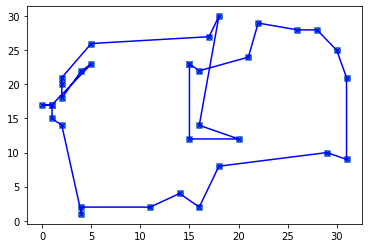

In [9]:
kk=len(zz)
zx=[]
zy=[]
for i in range(kk):
    zx.append(cities[int(zz[i])].x)
    zy.append(cities[int(zz[i])].y)

plt.scatter(zx,zy)
plt.plot([zx[i % kk] for i in range(kk+1)], [zy[i % kk] for i in range(kk+1)], 'xb-')
plt.show()